In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

In [2]:
# 设置 Excel 文件路径
output_path = 'output.xlsx'
# 读取 Excel 文件中的数据
output_df = pd.read_excel(output_path, engine='openpyxl')
print(output_df.info())
print(output_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Times   1461 non-null   int64  
 1   STC(1)  1461 non-null   float64
 2   STC(2)  1461 non-null   float64
 3   STC(3)  1461 non-null   float64
 4   STC(5)  1461 non-null   float64
 5   STC(6)  1461 non-null   float64
 6   STC(7)  1461 non-null   float64
 7   STC(8)  1461 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 91.4 KB
None
      Times     STC(1)     STC(2)     STC(3)    STC(5)    STC(6)    STC(7)  \
0  20100101 -12.582583 -12.205500 -11.741167 -9.909208 -8.338667 -4.940375   
1  20100102 -12.144458 -11.808125 -11.446208 -9.818208 -8.307292 -5.043083   
2  20100103 -10.098000 -10.225500 -10.309833 -9.550250 -8.235875 -5.125542   
3  20100104  -8.525958  -8.750167  -8.952917 -8.850875 -7.973333 -5.175208   
4  20100105 -11.754375 -11.017833 -10.206583 -8.446042 -7.605083 -5.157792   


In [3]:
# 设置 Excel 文件路径
label_path = 'T2010-2013.xlsx'
# 读取 Excel 文件中的数据
label_df = pd.read_excel(label_path, engine='openpyxl')
label_df = label_df.iloc[:, 3:]
print(label_df.info())
print(label_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5 cm    1461 non-null   float64
 1   10 cm   1461 non-null   float64
 2   20 cm   1461 non-null   float64
 3   50 cm   1461 non-null   float64
 4   90 cm   1461 non-null   float64
 5   140 cm  1461 non-null   float64
 6   245 cm  1461 non-null   float64
dtypes: float64(7)
memory usage: 80.0 KB
None
      5 cm    10 cm     20 cm    50 cm    90 cm   140 cm   245 cm
0 -12.7325 -12.4644 -11.28170 -9.85208 -8.52375 -4.64992 -1.25204
1 -12.6106 -12.4317 -11.34420 -9.90792 -8.59667 -4.70392 -1.35533
2 -11.9710 -11.8571 -10.99750 -9.69292 -8.55583 -4.78121 -1.46808
3 -10.1167 -10.1942  -9.88354 -9.15500 -8.32667 -4.83167 -1.56438
4 -10.4829 -10.3327  -9.56771 -8.71125 -7.97250 -4.88983 -1.70671


In [4]:
output_subset = output_df.columns.values
label_subset = label_df.columns.values
print(output_subset)
print(label_subset)

['Times' 'STC(1)' 'STC(2)' 'STC(3)' 'STC(5)' 'STC(6)' 'STC(7)' 'STC(8)']
['5 cm' '10 cm' '20 cm' '50 cm' '90 cm' '140 cm' '245 cm']


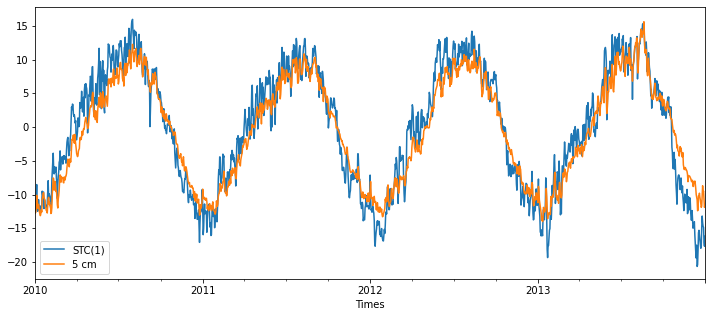

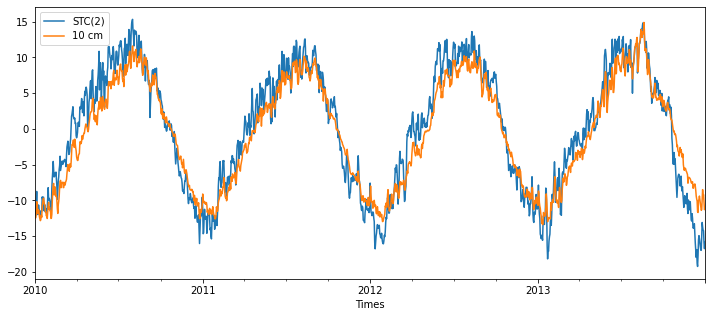

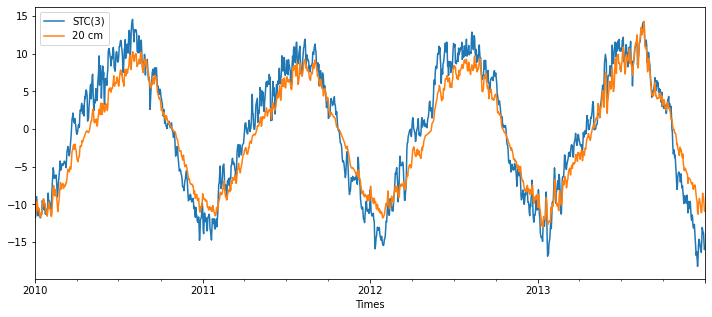

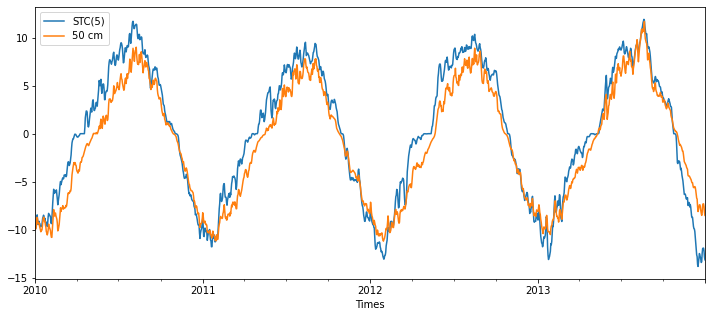

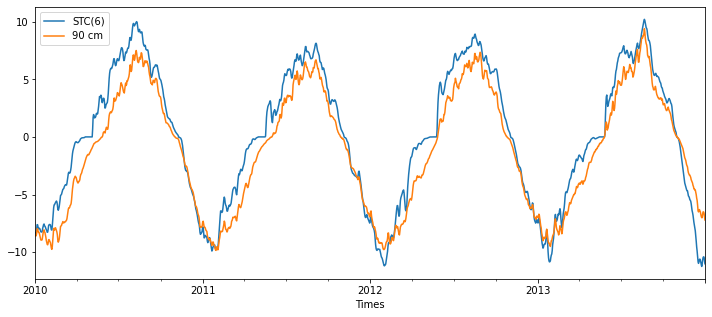

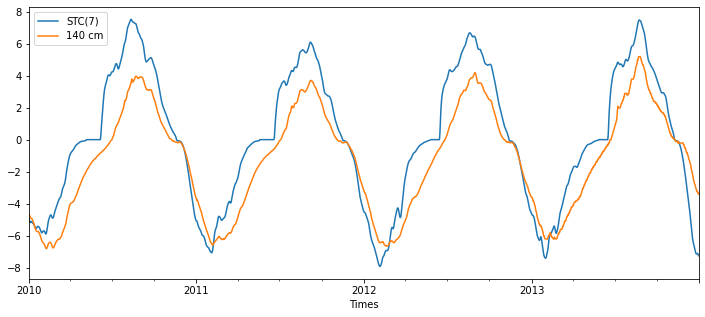

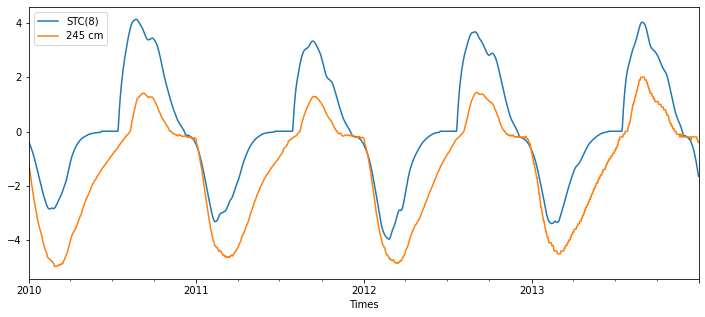

In [29]:
for i in range(1, len(output_subset)):
    # 创建一个新的DataFrame
    y = pd.DataFrame(data=None, columns=[output_subset[0],output_subset[i], label_subset[i-1]])
    y['Times'] = pd.to_datetime(output_df['Times'], format='%Y%m%d')
    y[output_subset[i]] = output_df[output_subset[i]]
    y[label_subset[i-1]] = label_df[label_subset[i-1]]
    y = y.set_index('Times')
    y.plot(figsize=[12,5])